## Name: Leeja Sagar Shrestha
## Group: L6CG7

**WORKSHEET 4**

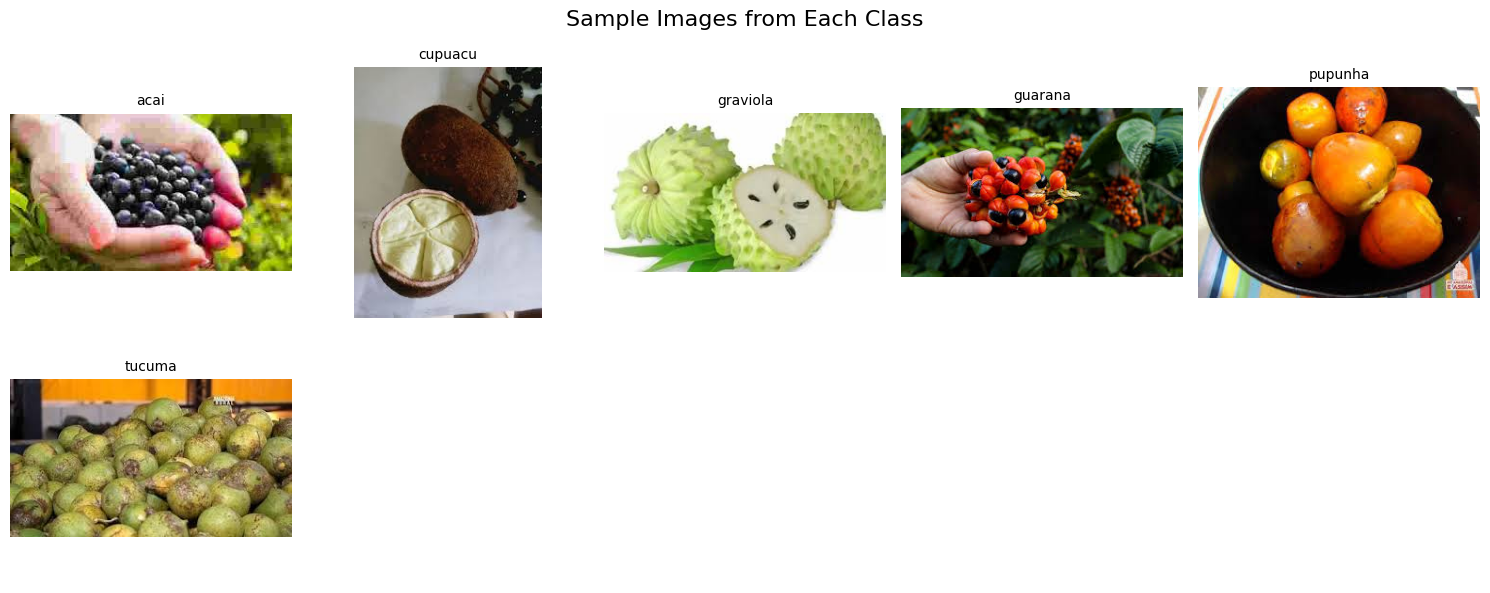

In [2]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_dir = "/content/drive/MyDrive/AIsem6/workshop5/FruitinAmazon/train"

class_names = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

if not class_names:
    raise ValueError("No class directories found in the train folder. Check dataset path!")

selected_images = []
selected_labels = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('png', 'jpg', 'jpeg'))]

    if image_files:
        random_image = random.choice(image_files)
        selected_images.append(os.path.join(class_path, random_image))
        selected_labels.append(class_name)

num_classes = len(selected_images)
if num_classes == 0:
    raise ValueError("No images found in any class folder. Please check dataset.")

cols = min(5, num_classes)
rows = (num_classes // cols) + (num_classes % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
fig.suptitle("Sample Images from Each Class", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i], fontsize=10)
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()


What did you Observe?

Each image represents a different class, confirming correct dataset structure.
Images vary in resolution, lighting, and orientation.
Some classes may have fewer images, indicating dataset imbalance.
Preprocessing (resizing, normalization) may be needed for consistency.

In [3]:
import os
from PIL import Image
train_dir = "/content/drive/MyDrive/AIsem6/workshop5/FruitinAmazon/train"

corrupted_images = []

for class_name in sorted(os.listdir(train_dir)):
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            try:

                with Image.open(image_path) as img:
                    img.verify()
            except (IOError, SyntaxError):

                corrupted_images.append(image_path)
                os.remove(image_path)
                print(f"Removed corrupted image: {image_path}")

if not corrupted_images:
    print("No Corrupted Images Found.")


No Corrupted Images Found.


In [4]:
import tensorflow as tf

img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

rescale = tf.keras.layers.Rescaling(1./255)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

train_ds = train_ds.map(lambda x, y: (rescale(x), y))

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

val_ds = val_ds.map(lambda x, y: (rescale(x), y))


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,097,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    optimizer='nadam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
import tensorflow as tf

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'Leeja_Shrestha.h5',
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.1858 - loss: 2.0251
Epoch 1: val_loss improved from inf to 1.85962, saving model to Leeja_Shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 624ms/step - accuracy: 0.1810 - loss: 2.0708 - val_accuracy: 0.0000e+00 - val_loss: 1.8596
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.2448 - loss: 1.8225
Epoch 2: val_loss improved from 1.85962 to 1.66687, saving model to Leeja_Shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 505ms/step - accuracy: 0.2461 - loss: 1.8161 - val_accuracy: 0.7778 - val_loss: 1.6669
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.3194 - loss: 1.6715
Epoch 3: val_loss did not improve from 1.66687
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 451ms/step - accuracy: 0.3229 - loss: 1.6652 - val_accuracy: 0.0000e+00 - val_loss: 2.6701
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 763ms/step - accuracy: 0.1887 - loss: 2.0235
Epoch 4: val_loss improved from 1.66687 to 1.21723, saving model to Leeja_Shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.1970 - loss: 1.9941 - val_accuracy: 0.8889 - val_loss: 1.2172
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.6348 - loss: 1.4471
Epoch 5: val_loss did not improve from 1.21723
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 538ms/step - accuracy: 0.6359 - loss: 1.4395 - val_accuracy: 0.2778 - val_loss: 1.5503
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.3600 - loss: 1.2834
Epoch 6: val_loss did not improve from 1.21723
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 522ms/step - accuracy: 0.3915 - loss: 1.2657 - val_accuracy: 0.5556 - val_loss: 1.3491
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.7899 - loss: 0.8838
Epoch 7: val_loss did not improve from 1.21723
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 529ms/step - accuracy: 0.7904 - loss: 0.8849 - val_accuracy: 0.5000 - val_loss: 1.4927
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.6748 - loss: 0.8832
Epoch 8: val_loss improved from 1.21723 to 1.02176, saving mod

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 507ms/step - accuracy: 0.6762 - loss: 0.8823 - val_accuracy: 0.6667 - val_loss: 1.0218
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 606ms/step - accuracy: 0.7193 - loss: 0.7169
Epoch 9: val_loss improved from 1.02176 to 0.72246, saving model to Leeja_Shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 827ms/step - accuracy: 0.7235 - loss: 0.7130 - val_accuracy: 0.6667 - val_loss: 0.7225
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.9497 - loss: 0.3662
Epoch 10: val_loss did not improve from 0.72246
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 601ms/step - accuracy: 0.9518 - loss: 0.3638 - val_accuracy: 0.6111 - val_loss: 0.8315
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.9797 - loss: 0.2421
Epoch 11: val_loss improved from 0.72246 to 0.37940, saving model to Leeja_Shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 513ms/step - accuracy: 0.9813 - loss: 0.2343 - val_accuracy: 0.8889 - val_loss: 0.3794
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.9699 - loss: 0.1473
Epoch 12: val_loss improved from 0.37940 to 0.33497, saving model to Leeja_Shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 577ms/step - accuracy: 0.9705 - loss: 0.1434 - val_accuracy: 0.8889 - val_loss: 0.3350
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 1.0000 - loss: 0.0614
Epoch 13: val_loss did not improve from 0.33497
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 533ms/step - accuracy: 1.0000 - loss: 0.0602 - val_accuracy: 0.8889 - val_loss: 0.3493
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 1.0000 - loss: 0.0288
Epoch 14: val_loss did not improve from 0.33497
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 474ms/step - accuracy: 1.0000 - loss: 0.0287 - val_accuracy: 0.8333 - val_loss: 0.3634
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 1.0000 - loss: 0.0168
Epoch 15: val_loss improved from 0.33497 to 0.31772, saving model to Leeja_Shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 585ms/step - accuracy: 1.0000 - loss: 0.0167 - val_accuracy: 0.8889 - val_loss: 0.3177
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - accuracy: 1.0000 - loss: 0.0116
Epoch 16: val_loss did not improve from 0.31772
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 783ms/step - accuracy: 1.0000 - loss: 0.0114 - val_accuracy: 0.8889 - val_loss: 0.3224
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 1.0000 - loss: 0.0070
Epoch 17: val_loss did not improve from 0.31772
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 548ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 0.8889 - val_loss: 0.3415
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 1.0000 - loss: 0.0039
Epoch 18: val_loss did not improve from 0.31772
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 442ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 0.8889 - val_loss: 0.3534
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 1.0000 - loss: 0.0031
Epoch 19: val_loss did not improve from 0.31772
3/3 

In [15]:
test_dir = '/content/drive/MyDrive/AIsem6/workshop5/FruitinAmazon/test'

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_ds)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.6333 - loss: 158.2995
Test Loss: 158.29946899414062
Test Accuracy: 0.6333333253860474


In [9]:

model.save('Leeja_Shrestha_model.h5')
print("Model saved successfully!")


Model saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.40      0.80      0.53         5
           2       0.80      0.80      0.80         5
           3       0.75      0.60      0.67         5
           4       1.00      0.60      0.75         5
           5       0.67      0.40      0.50         5

    accuracy                           0.63        30
   macro avg       0.70      0.63      0.64        30
weighted avg       0.70      0.63      0.64        30

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 623ms/step - accuracy: 1.0000 - loss: 0.0122
Epoch 1: val_loss did not improve from 0.31772
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 811ms/step - accuracy: 1.0000 - loss: 0.0121 - val_accuracy: 0.8333 - val_loss: 0.4052
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 620ms/step - accuracy: 1.0000 - loss: 0.0117
Epoch 2: val_loss did not improve from 0.31772
3/3 ━━━━━━━━━━━━

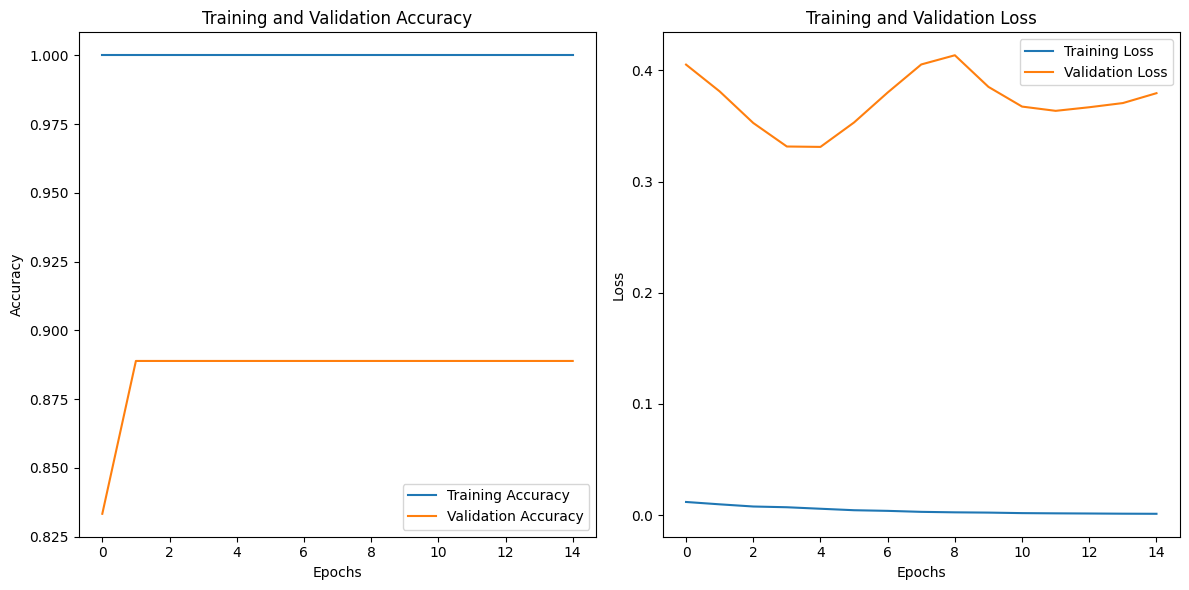

Model saved as 'Leeja_Shrestha_model.h5'


In [10]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

test_images, test_labels = [], []

for images, labels in test_ds:
    test_images.append(images)
    test_labels.append(labels)

test_images = np.concatenate(test_images, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

model.save('Leeja_Shrestha_model.h5')
print("Model saved as 'Leeja_Shrestha_model.h5'")


## Task 1: Improved Model with Data Augmentation, Batch Normalization, and Dropout

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of the data used for validation
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AIsem6/workshop5/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AIsem6/workshop5/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 72 images belonging to 6 classes.
Found 18 images belonging to 6 classes.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AIsem6/workshop5/FruitinAmazon/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/AIsem6/workshop5/FruitinAmazon/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Fit model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)


Found 90 images belonging to 6 classes.
Found 90 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,822 (6.21 MB)

 Trainable params: 1,626,374 (6.20 MB)

 Non-trainable params: 448 (1.75 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.1602 - loss: 2.9169 - val_accuracy: 0.1889 - val_loss: 1.7219
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 622ms/step - accuracy: 0.4110 - loss: 1.6178 - val_accuracy: 0.1556 - val_loss: 1.7161
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 652ms/step - accuracy: 0.5275 - loss: 1.2604 - val_accuracy: 0.2778 - val_loss: 1.6553
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 524ms/step - accuracy: 0.5506 - loss: 1.3663 - val_accuracy: 0.2778 - val_loss: 1.6170
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 514ms/step - accuracy: 0.6164 - loss: 1.0441 - val_accuracy: 0.1778 - val_loss: 1.6779
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 545ms/step - accuracy: 0.6544 - loss: 1.0715 - val_accuracy: 0.1667 - val_loss: 1.8335
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 591ms/step - accuracy: 0.6424 - loss: 0.9217 - val_accuracy: 0.1667 - val_loss: 1.9738
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6543 - loss: 1.0670 - val_accuracy: 0.1778 - val_loss: 2.082

## Task 2: Transfer Learning using VGG16

In [18]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Load base VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

predictions = Dense(6, activation='softmax')(x)

# Create model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

train_generator_vgg = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AIsem6/workshop5/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

val_generator_vgg = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/AIsem6/workshop5/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# Train the model
history_vgg = model.fit(train_generator_vgg, epochs=5, validation_data=val_generator_vgg)

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 6)              │         6,150 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,246,150 (58.16 MB)

 Trainable params: 531,462 (2.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Found 90 images belonging to 6 classes.
Found 90 images belonging to 6 classes.
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 143s 60s/step - accuracy: 0.1523 - loss: 1.9120 - val_accuracy: 0.3444 - val_loss: 1.6038
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 139s 59s/step - accuracy: 0.3765 - loss: 1.5718 - val_accuracy: 0.4778 - val_loss: 1.4545
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 113s 46s/step - accuracy: 0.4566 - loss: 1.5092 - val_accuracy: 0.6222 - val_loss: 1.2547
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 118s 51s/step - accuracy: 0.6552 - loss: 1.2621 - val_accuracy: 0.8333 - val_loss: 1.1246
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 112s 46s/step - accuracy: 0.7794 - loss: 1.1517 - val_accuracy: 0.8222 - val_loss: 1.0025


In [19]:
# Evaluate and Classification Report
import numpy as np
from sklearn.metrics import classification_report

# Predict and report
Y_pred = model.predict(val_generator_vgg)
y_pred = np.argmax(Y_pred, axis=1)
print("Classification Report:")
print(classification_report(val_generator_vgg.classes, y_pred, target_names=list(val_generator_vgg.class_indices.keys())))


3/3 ━━━━━━━━━━━━━━━━━━━━ 57s 19s/step
Classification Report:
              precision    recall  f1-score   support

        acai       0.18      0.13      0.15        15
     cupuacu       0.07      0.07      0.07        15
    graviola       0.31      0.27      0.29        15
     guarana       0.19      0.27      0.22        15
     pupunha       0.10      0.13      0.11        15
      tucuma       0.30      0.20      0.24        15

    accuracy                           0.18        90
   macro avg       0.19      0.18      0.18        90
weighted avg       0.19      0.18      0.18        90

